<center style><h1>Computer Assignment 0 Report</h1></center>

## part 1
First we import pandas library then read .csv file and store it into a data frame.

**head(n):** This function will returns n rows from begining of data frame.

**tail(n):** This function will returns n rows from end of data frame.

**describe(n):** This function will returns n statistics for about each column.

In [297]:
import pandas
initial_data = pandas.read_csv('FuelConsumptionCo2.csv')
print("head(n) :")
print(initial_data.head(5))
print("tail(n) :")
print(initial_data.tail(5))
print("describe() :")
print(initial_data.describe())

head(n) :
   Unnamed: 0  MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  \
0           0       2014  ACURA         ILX      COMPACT         2.0   
1           1       2014  ACURA         ILX      COMPACT         2.4   
2           2       2014  ACURA  ILX HYBRID      COMPACT         1.5   
3           3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5   
4           4       2014  ACURA     RDX AWD  SUV - SMALL         3.5   

   CYLINDERS TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0        4.0          AS5        Z                   9.9                  6.7   
1        4.0           M6        Z                  11.2                  7.7   
2        4.0          AV7        Z                   6.0                  5.8   
3        6.0          AS6        Z                  12.7                  9.1   
4        6.0          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0   

## Part 2

As we see FUELTYPE is not a numerical type so we assign numbers to each type:

In [298]:
print(initial_data.info())
initial_data['FUELTYPE'] = initial_data['FUELTYPE'].astype('category').cat.codes
#print(initial_data.to_string())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1067 non-null   int64  
 1   MODELYEAR                 1067 non-null   int64  
 2   MAKE                      1067 non-null   object 
 3   MODEL                     1058 non-null   object 
 4   VEHICLECLASS              1067 non-null   object 
 5   ENGINESIZE                1040 non-null   float64
 6   CYLINDERS                 1033 non-null   float64
 7   TRANSMISSION              1067 non-null   object 
 8   FUELTYPE                  996 non-null    object 
 9   FUELCONSUMPTION_CITY      1067 non-null   float64
 10  FUELCONSUMPTION_HWY       1067 non-null   float64
 11  FUELCONSUMPTION_COMB      1067 non-null   float64
 12  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 13  CO2EMISSIONS              964 non-null    float64
dtypes: float

## Part 3

First we print number of NaN data in each column using number of rows subtract by number of not null data in each column.
Then replace NaN data with mean value of each column.
In the end we extract rows with NaN data in CO2EMITION column and store them in new data frame.
Number of NaN data before replacing with mean value:

In [299]:
print(len(initial_data.index)-initial_data.count())
initial_data['ENGINESIZE'].fillna(value=initial_data['ENGINESIZE'].mean(),inplace=True)
initial_data['CYLINDERS'].fillna(value=initial_data['CYLINDERS'].mean(),inplace=True)
nan_data = initial_data[initial_data.CO2EMISSIONS.isna()]

Unnamed: 0                    0
MODELYEAR                     0
MAKE                          0
MODEL                         9
VEHICLECLASS                  0
ENGINESIZE                   27
CYLINDERS                    34
TRANSMISSION                  0
FUELTYPE                      0
FUELCONSUMPTION_CITY          0
FUELCONSUMPTION_HWY           0
FUELCONSUMPTION_COMB          0
FUELCONSUMPTION_COMB_MPG      0
CO2EMISSIONS                103
dtype: int64


Number of NaN data after replacing with mean value:

*MODEL column is not a numerical value so we cannot assign mean value to NaN data.*

<span style="color:red">some *Advantages and Disadvantages* </span>

In [300]:
print(len(initial_data.index)-initial_data.count())

Unnamed: 0                    0
MODELYEAR                     0
MAKE                          0
MODEL                         9
VEHICLECLASS                  0
ENGINESIZE                    0
CYLINDERS                     0
TRANSMISSION                  0
FUELTYPE                      0
FUELCONSUMPTION_CITY          0
FUELCONSUMPTION_HWY           0
FUELCONSUMPTION_COMB          0
FUELCONSUMPTION_COMB_MPG      0
CO2EMISSIONS                103
dtype: int64


## Part 4

First we filter CO2EMISSIONS then calculate mean value.

In [301]:
import time
start = time.time()
print(f"CO2 Emotion < 240 : {initial_data[initial_data['CO2EMISSIONS'] < 240].FUELCONSUMPTION_CITY.mean()}")
print(f"CO2 Emotion > 300 : {initial_data[initial_data['CO2EMISSIONS'] > 300].FUELCONSUMPTION_CITY.mean()}")
print(f"Executed in {time.time() - start} seconds")

CO2 Emotion < 240 : 10.03781902552204
CO2 Emotion > 300 : 18.663255813953487
Executed in 0.009994268417358398 seconds


## Part 5

As we can see, using loop will take longer time to execute.

<span style="color:red">some *Time results dont look correct* </span>

In [302]:
co2_240_sum = 0
co2_240_count = 0
co2_300_sum = 0
co2_300_count = 0
for index,row in initial_data.iterrows():
    if row['CO2EMISSIONS'] < 240:
        co2_240_sum += row['FUELCONSUMPTION_CITY']
        co2_240_count += 1
    elif row['CO2EMISSIONS'] > 300:
        co2_300_sum += row['FUELCONSUMPTION_CITY']
        co2_300_count += 1
start = time.time()
print(f"CO2 Emotion < 240 : {co2_240_sum/co2_240_count}")
print(f"CO2 Emotion > 300 : {co2_300_sum/co2_300_count}")
print(f"Executed in {time.time() - start} seconds")

CO2 Emotion < 240 : 10.037819025522042
CO2 Emotion > 300 : 18.663255813953487
Executed in 0.0009989738464355469 seconds


## Part 6


array([[<AxesSubplot:title={'center':'ENGINESIZE'}>,
        <AxesSubplot:title={'center':'CYLINDERS'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_CITY'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_HWY'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB_MPG'}>],
       [<AxesSubplot:title={'center':'CO2EMISSIONS'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

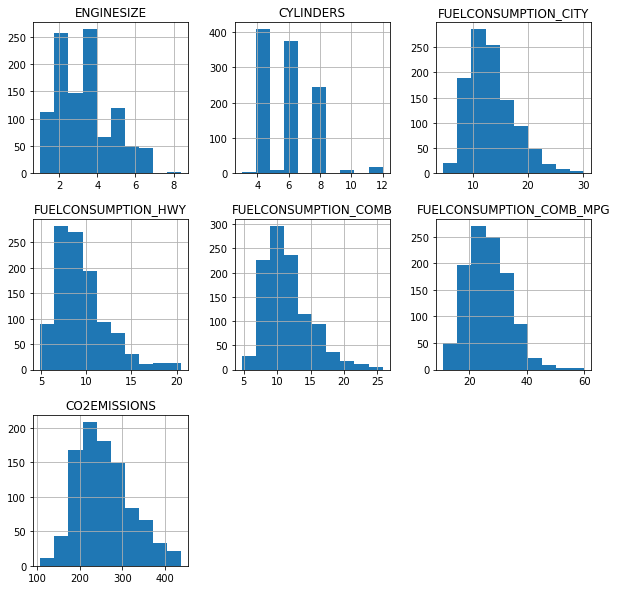

In [303]:
initial_data.hist(column=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY',
                          'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS'],figsize=(10,10))